In [18]:
import pandas as pd
import glob
import os

os.chdir(r"C:\Users\luism\Documents\Clase\4o\DCDC\DCDC-Proyecto-Stocks")

In [19]:
files = glob.glob('data/processed/FULL_DATASET_PROCESSED_part*.csv')

df = pd.concat([pd.read_csv(f) for f in files], ignore_index = True)

In [20]:
df.loc[4,"AAON"].split("val_adj_close': ")[1].split(",")[0]

'5.26'

In [21]:
# Values in cell are {"val_adj_close": value}, i want to have only the value
values = df.drop(columns = ['Date']).map(lambda x: float(x.split("val_adj_close': ")[1].split(",")[0][:-1]))

nasdaq_sum = values.sum(axis = 1)
nasdaq_sum.index = pd.to_datetime(df['Date'])
nasdaq_sum

Date
2012-01-03 00:00:00+00:00    2.571114e+12
2012-01-04 00:00:00+00:00    2.571086e+12
2012-01-05 00:00:00+00:00    2.782735e+12
2012-01-06 00:00:00+00:00    2.782714e+12
2012-01-09 00:00:00+00:00    2.722217e+12
                                 ...     
2020-01-28 00:00:00+00:00    7.344875e+04
2020-01-29 00:00:00+00:00    7.328687e+04
2020-01-30 00:00:00+00:00    7.274238e+04
2020-01-31 00:00:00+00:00    7.194222e+04
2020-02-03 00:00:00+00:00    7.217017e+04
Length: 2260, dtype: float64

In [22]:
nasdaq_sum.to_frame().rename(columns = {0: 'Value'})

,Value
Date,
2012-01-03 00:00:00+00:00,2.571114e+12
2012-01-04 00:00:00+00:00,2.571086e+12
2012-01-05 00:00:00+00:00,2.782735e+12
2012-01-06 00:00:00+00:00,2.782714e+12
2012-01-09 00:00:00+00:00,2.722217e+12
...,...
2020-01-28 00:00:00+00:00,7.344875e+04
2020-01-29 00:00:00+00:00,7.328687e+04
2020-01-30 00:00:00+00:00,7.274238e+04


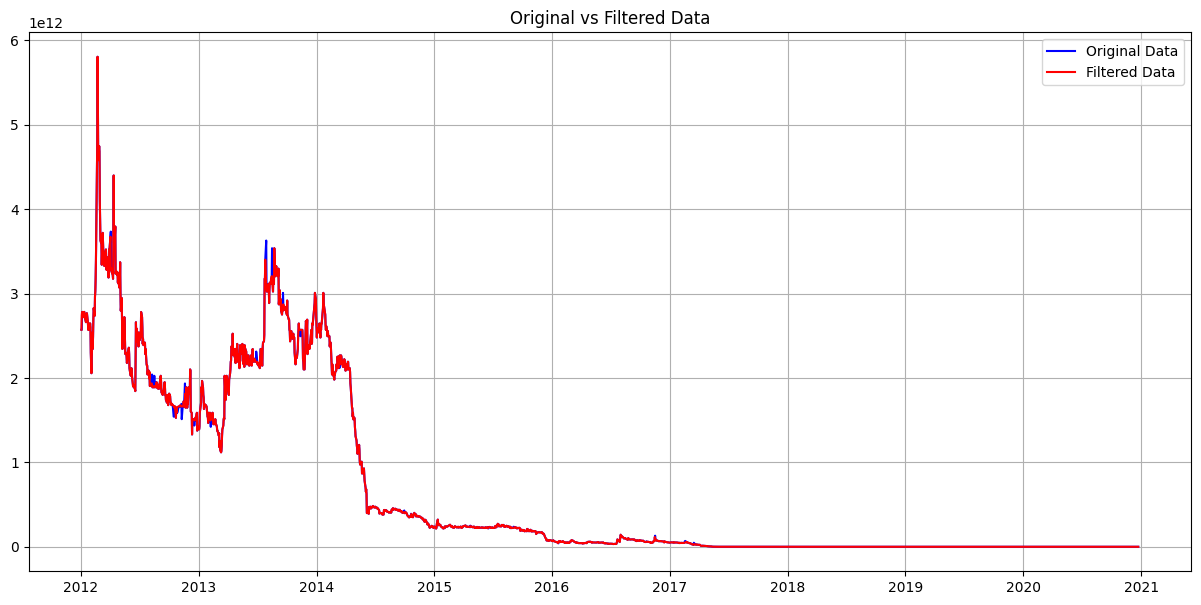

In [75]:
import pyhampel

# Apply the hampel filter to the data
filtered_data = pyhampel.hampel_filter_df(df=nasdaq_sum.to_frame().rename(columns = {0: 'Value'}), vals_col='Value', win_size=10, num_dev=3)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(filtered_data['Value'], label='Original Data', color='blue')
ax.plot(filtered_data['FLTRD_VAL'], label='Filtered Data', color='red')
ax.legend()
plt.title('Original vs Filtered Data')
plt.grid()
plt.show()
filtered_data = filtered_data.reset_index()


In [103]:
outliers = filtered_data.query('IS_OUTLIER == True').reset_index(drop=True)

outliers["Diff"] = outliers["Value"] - outliers["FLTRD_VAL"]
outliers["Date"] = pd.to_datetime(outliers["Date"]).dt.date
# If diff is negative, the expected value is higher than the real value, the index underperformed.
# If diff is positive, the expected value is lower than the real value, the index overperformed.

outliers = outliers[['Date', 'Diff']]
outliers["Outlier"] = outliers["Diff"].map(lambda x: "Underperformed" if x < 0 else "Overperformed")
display(outliers)

reasons = [
    "None",
    "None",
    "Central bank action to help economy. Lower jobless rates in the US. (https://www.nasdaq.com/articles/ahead-wall-street-august-9-2012-ahead-wall-street-2012-08-09)",
    "None",
    "Outlier in a uncertain market. NASDAQ rose (https://www.nasdaq.com/articles/ahead-wall-street-august-20-2012-ahead-wall-street-2012-08-20)",
    "None",
    ""
]

"""
0   2012-01-04	-1.737969e+11	Underperformed  
1	2012-04-03	4.535912e+11	Overperformed   
2	2012-08-09	1.360670e+11	Overperformed   Central bank action to help economy. Lower jobless rates in the US. (https://www.nasdaq.com/articles/ahead-wall-street-august-9-2012-ahead-wall-street-2012-08-09)
3	2012-08-16	1.285194e+11	Overperformed   
4	2012-08-20	5.291656e+10	Overperformed   Outlier in a uncertain market. NASDAQ rose (https://www.nasdaq.com/articles/ahead-wall-street-august-20-2012-ahead-wall-street-2012-08-20)
5	2012-10-15	-1.285207e+11	Underperformed  
6	2012-10-16	-1.209609e+11	Underperformed
7	2012-10-26	-6.803900e+10	Underperformed
8	2012-11-08	3.024284e+10	Overperformed
9	2012-11-09	-1.511972e+11	Underperformed
10	2012-11-19	2.721536e+11	Overperformed
11	2012-12-18	-6.804239e+10	Underperformed
12	2013-02-07	-1.360791e+11	Underperformed
13	2013-06-28	1.209595e+11	Overperformed  investor optimism about the economy's improvement, drove market volatility despite the overall sell-off triggered by concerns about rising interest rates and reduced Fed stimulus. (https://www.nasdaq.com/articles/weekly-economic-outlook-june-24-june-28-2013-2013-06-24)
14	2013-07-11	1.814386e+11	Overperformed
15	2013-07-29	5.594405e+11	Overperformed
16	2013-08-16	3.855600e+11	Overperformed
17	2013-09-19	1.965598e+11	Overperformed
18	2013-11-12	-7.559992e+10	Underperformed
19	2014-03-13	-1.360798e+11	Underperformed
20	2014-09-30	2.268006e+10	Overperformed
21	2014-10-21	3.455973e+10	Overperformed
22	2015-04-22	-5.400017e+09	Underperformed Strong earnings reports from companies like McDonald's, Coca-Cola, and Visa, along with positive economic news about home sales, boosted investor sentiment, driving the major indexes higher. (https://www.nasdaq.com/articles/stock-market-news-for-jul-9-2019-2019-07-09)
23	2015-04-23	1.403998e+10	Overperformed
24	2015-05-26	-2.159980e+09	Underperformed
25	2015-06-18	-1.079999e+10	Underperformed
26	2015-09-04	1.188006e+10	Overperformed Markets finished mixed on Thursday, with European Central Bank President Draghi's dovish comments boosting sentiment, while cautiousness ahead of the upcoming jobs report led to fading gains; the Dow and S&P 500 posted modest gains, but the Nasdaq closed lower. (https://www.nasdaq.com/articles/stock-market-news-for-september-04-2015-2015-09-04)
27	2016-01-21	-1.511998e+10	Underperformed US and European stocks are up, buoyed by ECB President Draghi's stimulus comments, while Asia sees declines; despite a rebound in crude oil, investors remain cautious after the S&P 500 dropped below key support levels, signaling potential for further declines. (https://www.nasdaq.com/articles/mid-equity-market-insight-january-21-2016-2016-01-21)
28	2016-10-20	6.911993e+09	Overperformed
29	2016-11-16	5.778002e+10	Overperformed
30	2017-02-06	3.024008e+09	Overperformed
31	2017-02-16	1.674000e+10	Overperformed
32	2017-02-17	1.933200e+10	Overperformed
33	2017-03-16	1.857600e+10	Overperformed The market showed cautious optimism with slight gains across major indices, driven by strong US economic data and a dovish Federal Reserve, while the Nasdaq saw positive performance, particularly in tech stocks like Oracle and GoPro, despite some overbought signals in financials. (https://www.nasdaq.com/articles/equity-market-insight-nasdaq-mid-march-16-2017-2017-03-16 )
34	2017-03-17	1.425601e+10	Overperformed
35	2017-09-14	2.152969e+05	Overperformed
36	2017-11-06	1.156039e+06	Overperformed
37	2017-11-07	1.921356e+06	Overperformed
38	2018-01-08	1.266284e+04	Overperformed
39	2018-01-19	-1.178571e+04	Underperformed
40	2018-02-15	3.714419e+04	Overperformed Benchmarks closed higher for the fourth consecutive day, with strong earnings and a steady economy driving the gains, despite an initial decline after a better-than-expected consumer prices report, while the Nasdaq outperformed with a 1.9% increase. (https://www.nasdaq.com/articles/stock-market-news-for-feb-15-2018-2018-02-15)
41	2018-03-16	1.156649e+04	Overperformed
42	2018-03-26	4.245379e+04	Overperformed
43	2018-03-27	7.983648e+04	Overperformed
44	2018-05-09	1.393511e+04	Overperformed Markets ended almost flat on Tuesday, with the Dow and Nasdaq closing slightly higher, while the S&P 500 finished lower. Investor sentiment fluctuated after President Trump's announcement to withdraw from the Iran nuclear deal, leading to volatility in oil prices. While initial declines in oil prices were reversed later in the day, concerns over global crude supply disruptions remained a key theme. The broader energy sector rebounded, supported by expectations that sanctions on Iran could reduce oil production, which eventually pushed oil prices higher. (https://www.nasdaq.com/articles/stock-market-news-for-may-9-2018-2018-05-09)
45	2018-08-31	4.400260e+03	Overperformed
46	2019-03-11	9.853985e+03	Overperformed
47	2019-03-21	1.007823e+04	Overperformed
48	2019-06-13	5.803935e+03	Overperformed
49	2019-07-09	2.173705e+04	Overperformed The market overperformed that day because stronger-than-expected jobs data led to lower expectations for a Fed rate cut, which boosted investor sentiment despite the general market decline. (https://www.nasdaq.com/articles/stock-market-news-for-jul-9-2019-2019-07-09)
"""

,Date,Diff,Outlier
0,2012-01-04,-1.737969e+11,Underperformed
1,2012-04-03,4.535912e+11,Overperformed
2,2012-08-09,1.360670e+11,Overperformed
3,2012-08-16,1.285194e+11,Overperformed
4,2012-08-20,5.291656e+10,Overperformed
5,2012-10-15,-1.285207e+11,Underperformed
6,2012-10-16,-1.209609e+11,Underperformed
7,2012-10-26,-6.803900e+10,Underperformed
8,2012-11-08,3.024284e+10,Overperformed
9,2012-11-09,-1.511972e+11,Underperformed
